(ch:twoD-data)=
# 2차원 데이터

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

50명 학생의 영어와 수학 점수를 포함하는 2차원 데이터를 데이터프레임으로 불러와서
두 점수 데이터의 상관관계를 분석한다.
예를 들어, '수학을 잘하는 학생은 영어도 잘하는가'와 같은 두 데이터의 상관성을 확인한다.

상관성은 보통 선형 상관계수로 평가되며, 이를 설명하기 위해 먼저 공분산 개념을 소개한다.

## 선형 상관관계

어떤 학생의 영어 점수가 높을 수록 수학 점수도 함께 높아지는 경향이 있을 때
두 점수 사이에 양의 상관관계가 있다고 말한다.
반면에 영어 점수가 높을 수록 수학 점수가 떨어질 때는
두 점수 사이에 음의 상관관계가 존재한다.
그런데 영어 점수가 달라지더라도 수학 점수는 별 변화가 없을 때는 두 데이터의
선형 상관관계가 없다.

50명 학생의 영어와 수학 점수를 포함하는 2차원 데이터를 데이터프레임으로 불러와서
두 점수 데이터의 상관관계를 분석한다.
예를 들어, '수학을 잘하는 학생은 영어도 잘하는가'와 가트 두 데이터의 상관성을 확인한다.

상관성은 보통 공분산 또는 상관계수를 이용한 선형 상관계수로 평가한다.

### 데이터 준비

50명의 영어와 수학 점수를 담고 있는 csv 파일을 데이터프레임으로 불러온다. 이때 학생번호를 인덱스로 지정한다

In [7]:
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')

english와 mathematics 두 개의 특성이 포함되어 있으며 각각 50개의 데이터 샘플을 포함한다.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


**10개 데이터 샘플 추출**

보다 쉬운 설명하기 위해 처음 10개의 데이터만 이용해서
두 종류의 데이터 사이의 상관관계를 설명한다.

먼저 학생들의 이름을 활용할 수 있도록 
처음 열 명의 이름 A, B, C, …, J를 인덱스로 지정하며
또한 인덱스의 이름을 student로 지정한다.
두 가지 방식으로 진행하며, 먼저 넘파이 어레이를 활용한다.

방식 1: 넘파이 어레이 활용

각각의 특성에서 처음 10개 데이터만 추출해서 어레이로 지정한다.

In [9]:
eng_scores = np.array(df['english'])[:10]
math_scores = np.array(df['mathematics'])[:10]

추출된 두 개의 데이터에 대해 각각 english, mathematics 특성명과 함께
각 데이터 샘플의 인덱스를 언급된 알파벳으로 지정하면서
새로운 데이터프레임을 생성한다.
또한 인덱스의 이름을 student로 한 번에 지정한다.

In [10]:
scores_df = pd.DataFrame({'english':eng_scores,
                          'mathematics':math_scores},
                         index=pd.Index(list('ABCDEFGHIJ'),
                                        name='student'))

In [11]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


방식 2: 데이터프레임 슬라이싱 활용

처음 10개의 데이터 샘플을 데이터프레임에서 슬라이싱을 이용하여 직접 추출할 수 있다.
단, 원본은 그대로 두고 슬라이싱 후 사본을 지정한다.

이유는 데이터프레임의 슬라이싱은 
{numref}`%s장 <ch-numpy-array>`에서 소개한
뷰<font size='2'>view</font> 기능을 사용하기 때문이다.
뷰 방식으로 생성된 데이터프레임을 수정하면 원본 데이터프레임도 함께 수정되기에
이를 피하기 위해 일반적으로 사본을 만드는 것을 추천한다.

In [12]:
scores_df = df.iloc[:10].copy()
scores_df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


데이터프레임의 `index` 속성에 데이터셋의 크기에 해당하는 리스트를 지정하는
방식으로 인덱스를 변경한다.

In [13]:
scores_df.index = list('ABCDEFGHIJ')

데이터프레임의 `index` 속성이 가리키는 `Index` 객체의 `name` 속성을 `student`로 지정한다.

In [14]:
scores_df.index.name = 'student'

이전 방식과 동일한 결과를 얻는다.

In [15]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 산점도

먼저 두 데이터 사이의 선형 상관관계의 정도를 눈으로 어느 정도 파악할 수 있는지
여부를 보기 위해 산점도를 이용한다.
산점도는 `matplotlib.pyplot` 라이브러리에 포함된 `scatter()` 함수를 이용한다.

`plt.annotate()` 함수는 그래프의 특정 좌표에 지정된 레이블을 표기하는 함수다.
최소 아래 두 종류의 인자가 요구된다.

- 첫째 인자: 표기하고자 하는 문자열
- 둘째 인자: 표기 위치. (x-좌표, y-좌표)의 튜플.


x-축이 영어 점수, y-축이 수학 점수의 분포를 보여준다.

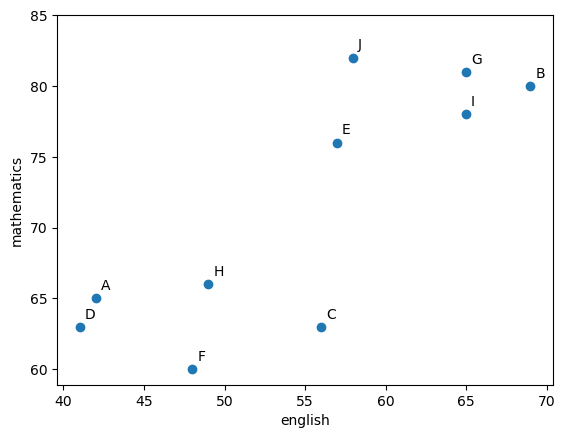

In [16]:
plt.scatter(eng_scores, math_scores)
plt.xlabel('english')
plt.ylabel('mathematics')

# 학생 데이터 각각에 이름 추가
for i, name in enumerate(scores_df.index):
    plt.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
plt.xticks(range(40, 75, 5))
plt.yticks(range(60, 90, 5))
    
plt.show()

위 산점도를 통해 영어 점수가 높아질 수록 수학 점수도 기본적으로 올라가는 경향을 잘 보여준다. 
즉 영어 점수와 수학 점수는 양의 상관관계를 갖는다고 말할 수 있다.

상관관계를 수치화할 수 있으며, 공분산과 상관계수가 활용된다.
먼저 공분산을 소개한다.

### 공분산

공분산은 분산의 경우처럼 면적 개념으로 이해할 수 있다.
아래 그림은 C, E, H 세 학생에 대해, 영어 점수와 수학 점수와의 편차를
가로와 세로의 길이로 세 개의 직사각형을 보여준다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch03/img-3-2.jpg?raw=true" style="width:500px"></div></p>

참고로 10명 학생의 영어, 수학 평균값은 각각 55.0과 71.4다.

In [17]:
scores_df.mean()

english        55.0
mathematics    71.4
dtype: float64

분산과는 달리 공분산은 음수가 나올 수 있다.
이유는 분산은 한 종류의 값에 대해 편차의 제곱, 즉 편차의 크기를 한 변으로 갖는 정사각형의 면적의 평균값으로 계산되기 때문이다.
반면에 공분산은 두 종류의 값에 대한 편차의 곱을 이용하기에 각각의 편차의 부호가 다르면 편차의 곱이 음수가 될 수 있다.
위 그림에서 C 학생에 대한 직사각형의 면적은 음의 값으로 계산되며, E와 H의 학생에 대한 직사각형의 면적은 양의 값으로 계산된다.

공분산은 모든 학생에 대한 직사각형의 면적의 평균값으로 계산되기에 양의 값도, 음의 값도 가질 수 있다.
수식으로 표현하면 다음과 같다.
공분산은 일반적으로 $S_{xy}$로 표기된다.

$$
\begin{align*}
S_{xy} & = \frac 1 n \sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y) \\
&= \frac 1 n \left\{ (x_1 - \bar x)(y_1 - \bar y) + (x_2 - \bar x)(y_2 - \bar y) + \cdots + (x_n - \bar x)(y_n - \bar y) \right\}
\end{align*}
$$

아래 코드는 위 수식을 적용하는 데에 필요한 값들을 모아 높은 데이터프레임을 선언한다.

**참고**

특성명에 사용된 dev는 편차를 의미하는 영어 단어 deviation의 줄임말이다.

In [18]:
summary_df = scores_df.copy()

summary_df['eng_dev'] = summary_df['english'] - summary_df['english'].mean()
summary_df['math_dev'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['dev_product'] = summary_df['eng_dev'] * summary_df['math_dev']

In [19]:
summary_df

,english,mathematics,eng_dev,math_dev,dev_product
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


따라서 영어와 수학의 공분산은 `dev_product` 특성의 평균값인 62.8이며,
두 점수는 양의 상관관계를 가지며, 이는 이미 산포도를 보고 예상된 결과와 일치한다.

In [20]:
summary_df['dev_product'].mean()

62.800000

**`np.cov()` 함수**

이전 코드는 공분산 계산과정을 구체적으로 보여주기 위해 사용되었다.
하지만 넘파이와 팬다스 모두 공분산을 계산하는 API를 제공한다.

아래 코드는 두 개의 데이터가 주어졌을 때 두 데이터의 공분산을 계산한다.
`np.cov()`가 두 개의 데이터에 대한 공분산을 계산하기에 (2, 2) 행렬 모양의 어레이가 생성한다.

In [21]:
cov_mat = np.cov(eng_scores, math_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

인덱스별 항목의 의미는 다음과 같다.

| 인덱스 | 의미 |
| :---: | :--- |
| `[0, 0]` | 영어 점수와 영어 점수의 공분산, 즉 영어 점수의 분산 |
| `[0, 1]` | 영어 점수와 수학 점수의 공분산 |
| `[1, 0]` | 수학 점수와 영어 점수의 공분산 |
| `[1, 1]` | 수학 점수와 수학 점수의 공분산, 즉 수학 점수의 분산 |

'영어 점수와 수학 점수의 공분산'과 '수학 점수와 영어 점수의 공분산'은 당연히 동일하다.
그리고 각 과목별 공분산은 해당 과목 점수의 분산과 동일하다.
실제로 두 과목의 분산을 계산하면 동일하게 계산된다.

In [22]:
print("영어 점수 분산:", np.var(eng_scores, ddof=0))

영어 점수 분산: 86.0


In [23]:
print("수학 점수 분산:", np.var(math_scores, ddof=0))

수학 점수 분산: 68.44000000000001


**데이터프레임의 `cov()` 메서드**

데이터프레임 객체의 `cov()` 메서드는 모든 특성들 사이의 공분산을 계산한다.
`scores_df`에 `english`와 `mathematics` 두 개의 특성이 포함되기에 역시 (2, 2) 행렬 모양의
데이터프레임을 생성한다.

앞서 `np.cov()`의 반환값을 설명할 때 사용된 인덱스가 여기서는 특성명으로 대체되었다.

In [24]:
scores_df.cov(ddof=0)

,english,mathematics
english,86.0,62.80
mathematics,62.8,68.44


**참고**

`ddof=1`로 지정하면 불편분산이 계산된다.

In [25]:
cov_mat = np.cov(eng_scores, math_scores, ddof=1)
cov_mat

array([[95.555556, 69.777778],
       [69.777778, 76.044444]])

In [26]:
scores_df.cov(ddof=1)

,english,mathematics
english,95.555556,69.777778
mathematics,69.777778,76.044444


## 상관계수

공분산은 데이터의 종류와 크기에 따라 계산된 값의 크기와 단위가 달라진다.
예를 들어 학생들의 키와 체중을 대상으로 공분산을 계산한다면 단위가 `cm * kg`이 되고,
멀리뛰기와 오래 매달리기의 공분산은 단위가 `m * sec`이 된다.

그리고 동일한 단위를 사용한다 하더라도 데이터가 달라지면 공분산 값이 갖는 값의 척도(scale)도
많이 달라질 수 있다.
실제로 10명이 아닌 50명 전체를 대상으로 영어 점수와 수학 점수의 공분산을 계산하면
공분산이 60점 대에서 50점 대로 달라진다.

In [27]:
df.cov(ddof=0)

,english,mathematics
english,94.1156,58.4856
mathematics,58.4856,69.3856


이렇듯 공분산은 계산된 값만 보고서는 상관관계가 얼마나 큰지를 판단할 수 있는 절대적인 기준을 갖지 못한다.
이점을 보완하기 위해 공분산을 각 데이터의 표준편차로 나누어 데이터의 크기와 단위에 의존하지 않도록 지표를 정의하며,
이를 **상관계수**<font size='2'>correlation coefficient</font>라 부른다.
엄밀히 말하면 **피어슨 상관계수**<font size='2'>Pearson correlation coefficient</font>라고 한다.
다른 방식으로 계산되는 상관계수도 있지만 여기서는 피어슨 상관계수만 사용한다.

상관계수는 일반적으로 $r_{xy}$로 표기되며 다음과 같이 계산된다.

$$
r_{xy} = \frac{S_{xy}}{S_x \cdot S_y}
$$

두 데이터의 피어슨 상관계수 $r_{xy}$는 항상 -1과 1 사이의 값을 가지며 단위는 무시된다.
상관계수의 의미는 다음과 같다.

| 상관계수 | 의미 |
| :--- | :--- |
| 1에 가까운 값 | 양의 상관관계가 강함 |
| -1에 가까운 값 | 음의 상관관계가 강함 |
| 0에 가까운 값 | 상관관계가 거의 없음 |

아래 그림은 다양한 상관계수에 대응하는 산점도를 보여준다.
상관계수의 절댓값이 1에 가까워질 수록 산점도가 직선에 가까워지고
0에 가까워질 수록 두 데이터의 상관관계를 알아보기 힘들어지도록 넓게 퍼진 산점도가 된다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch03/img-3-3.jpg?raw=true" style="width:500px"></div></p>

**`np.corrcoef()` 함수**

10명 학생의 상관계수를 직접 다음과 같이 계산한다.
`np.corrcoef()` 함수의 반환값의 모양과 각 인덱스의 의미는 
`np.cov()` 함수의 반환값의 그것들과 동일하다.

In [28]:
np.corrcoef(eng_scores, math_scores)

array([[1.      , 0.818569],
       [0.818569, 1.      ]])

즉, 10명 학생의 영어 점수와 수학 점수의 상관계수가 0.82 정도로 1에 무척 가깝다.
따라서 두 데이터 사이의 선형 상관관계가 매우 큰 편이다.

**데이터프레임의 `corr()` 메서드**

데이터프레임도 상관계수를 직접 계산한다.

In [29]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


50명 전체에 대한 상관계수는 0.72 정도로 조금 약해지지만 그래도 영어 점수와 수학 점수 사이의 여전히 강한 선형 상관관계를 보여준다.

In [30]:
df.corr()

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000


## 연습문제

참고: [(연습) 2차원 데이터](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-twoD_data.ipynb)